**Challenge 1**

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [54]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [55]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',\
                 header = None)

In [56]:
mapping = {'n':0, 'y':1, '?':np.nan}
df_raw = df.replace(mapping)
df_raw_Q1_Q9 = df_raw.copy(deep=True)

In [57]:
df_raw_Q1_Q9.iloc[:,1:] = df_raw_Q1_Q9.iloc[:,1:].apply(lambda x: x.fillna(np.nanmean(x.values)), axis = 0).round(2)

In [58]:
df_raw_Q1_Q9.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00,1.0,0.0,1.00,1.0,1.0,0.0,0.0,0.0,1.0,0.36,1.00,1.00,1.00,0.00,1.00
1,republican,0.00,1.0,0.0,1.00,1.0,1.0,0.0,0.0,0.0,0.0,0.00,1.00,1.00,1.00,0.00,0.81
2,democrat,0.44,1.0,1.0,0.42,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,1.00,0.00,0.00
3,democrat,0.00,1.0,1.0,0.00,0.5,1.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,0.00,0.00,1.00
4,democrat,1.00,1.0,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.42,1.00,1.00,1.00,1.00
5,democrat,0.00,1.0,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00,1.00,1.00,1.00,1.00
6,democrat,0.00,1.0,0.0,1.00,1.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.51,1.00,1.00,1.00
7,republican,0.00,1.0,0.0,1.00,1.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00,1.00,1.00,0.43,1.00
8,republican,0.00,1.0,0.0,1.00,1.0,1.0,0.0,0.0,0.0,0.0,0.00,1.00,1.00,1.00,0.00,1.00
9,democrat,1.00,1.0,1.0,0.00,0.0,0.0,1.0,1.0,1.0,0.0,0.00,0.00,0.00,0.00,0.43,0.81


**Challenge 2**

Split the data into a test and training set. Use this function:

```
from sklearn.cross_validation import train_test_split
```


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df_raw_Q1_Q9.iloc[:,1:] 
y = df_raw_Q1_Q9[0]

In [61]:
X_train, X_test, y_train, y_test  =  train_test_split(X, y, test_size = 0.3, random_state = 4444)

**Challenge 3**

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

```
from sklearn.neighbors import KNeighborsClassifier
```

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

```
from sklearn.metrics import accuracy_score
```

Which k value gives the highest accuracy?

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
accuracy_knn = np.zeros(len(X_test)-1)
index = np.linspace(0, len(X_test), len(X_test)-1)
for i in range(1,len(X_test)):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    accuracy_knn[i-1] = accuracy_score(y_test, y_pred)

In [11]:
import matplotlib.pylab as plt

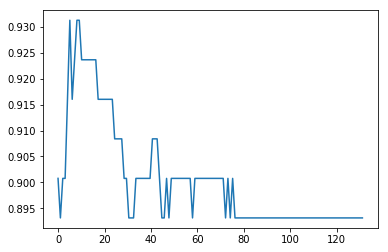

In [12]:
plt.plot(index, accuracy_knn)

In [13]:
_max = accuracy_knn.argmax()
print(_max, accuracy_knn[_max])

5 0.9312977099236641


So k= 5 produces the highest accuracy

**Challenge 4**

Make a similar model but with `LogisticRegression` instead, calculate test accuracy.


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lm = LogisticRegression(random_state = 4444, C = 1, solver = 'lbfgs')
lm.fit(X_train,y_train)
lm.predict_proba(X_test)
lm.score(X_test, y_test)

0.9312977099236641

**Challenge 5**

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

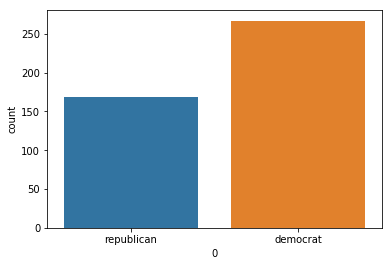

In [16]:
sns.countplot(y)

In [17]:
y.describe()

count          435
unique           2
top       democrat
freq           267
Name: 0, dtype: object

267 democrats and 168 republicans

In [18]:
def predict_dem(y):
    return np.full((len(y),1),'democrat')

def predict_rep(y):
    return np.full((len(y),1),'republican')

In [19]:
accuracy_dem = accuracy_score(y_test, predict_dem(y_test))

In [20]:
accuracy_rep = accuracy_score(y_test, predict_rep(y_test))

**Challenge 6**

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.



In [21]:
np_accuracy_dem = np.full((len(y_test) - 1,1),accuracy_dem)
np_accuracy_rep = np.full((len(y_test) - 1,1),accuracy_rep)
np_accuracy_logit = np.full((len(y_test) - 1,1), lm.score(X_test, y_test))

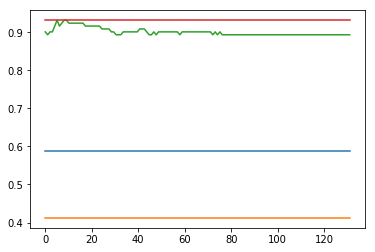

In [22]:
plt.plot(index, np_accuracy_dem)
plt.plot(index, np_accuracy_rep)
plt.plot(index, accuracy_knn)
plt.plot(index, np_accuracy_logit)

**Challenge 7**

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

```
from sklearn.learning_curve import learning_curve

In [23]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

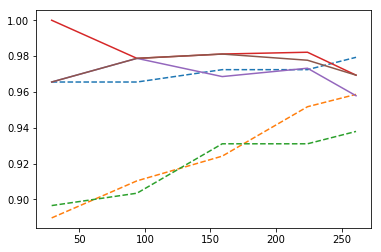

In [24]:
train_sizes, train_scores, test_scores = learning_curve(estimator = lm, X = X, y = y, train_sizes= [0.1, 0.325, 0.55 , 0.775, 0.9],cv= 3, scoring=None,\
               random_state=4444, error_score='raise-deprecating')
plt.plot(train_sizes, test_scores, linestyle = '--')
plt.plot(train_sizes, train_scores)

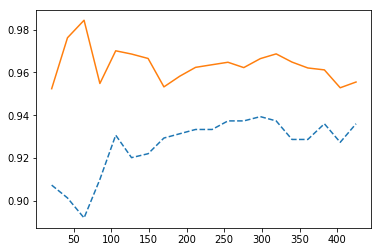

In [25]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=5), \
                                                        X = X, y = y, train_sizes= np.linspace(0.05,0.99,20) ,cv= 100, \
                                                        scoring=None, random_state=4444, error_score='raise-deprecating')
plt.plot(train_sizes, np.mean(test_scores, axis = 1), linestyle = '--')
plt.plot(train_sizes, np.mean(train_scores, axis = 1))

**Challenge 8**

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

```
from sklearn.naive_bayes import GaussianNB
```

SVM (Support Vector Machine) Classifier

```
from sklearn.svm import SVC
```

Decision Tree

```
from sklearn.tree import DecisionTreeClassifier
```

Random Forest

```
from sklearn.ensemble import RandomForestClassifier

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

lm = GaussianNB()
lm.fit(X_train,y_train)
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

0.930921052631579
0.9389312977099237


In [30]:
np.mean(cross_val_score(lm, X, y, scoring='accuracy', cv = 10))

0.9397739857042182

In [31]:
from sklearn.svm import SVC

lm = SVC()
lm.fit(X_train,y_train)
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

0.9572368421052632
0.9541984732824428


/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
np.mean(cross_val_score(lm, X, y, scoring='accuracy', cv = 10))

/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ikennaigboaka/anaconda3/

0.9582804792107119

In [33]:
from sklearn.tree import DecisionTreeClassifier

lm = DecisionTreeClassifier()
lm.fit(X_train,y_train)
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

1.0
0.9541984732824428


In [34]:
np.mean(cross_val_score(lm, X, y, scoring='accuracy', cv = 10))

0.944540924192087

In [35]:
from sklearn.ensemble import RandomForestClassifier

lm = RandomForestClassifier()
lm.fit(X_train,y_train)
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

0.9967105263157895
0.9541984732824428


/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
np.mean(cross_val_score(lm, X, y, scoring='accuracy', cv = 10))

0.9630423839726167


**Challenge 9**

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

```
from sklearn.cross_validation import cross_val_score
```

Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.


added cross_val scores inline with question 8 

**Challenge 10**

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [62]:
df_raw_Q10 = df_raw.copy(deep=True)
row_to_evaluate = 2

In [63]:
df_raw_Q10.drop(labels = [0], axis = 1, inplace=True)

In [64]:
from scipy import stats
df_raw_Q10.iloc[:,0:] = df_raw_Q10.iloc[:,0:].apply(lambda x: x.fillna(stats.mode(x, nan_policy = 'omit', axis = None)\
                                                                       [0][0]), axis = 0).round(2)

In [65]:
X = df_raw_Q10.drop(labels = [row_to_evaluate], axis = 1)
y = df_raw_Q10[row_to_evaluate]
lm = LogisticRegression(random_state = 4444)

In [66]:
np.mean(cross_val_score(lm, X, y, scoring = 'accuracy', cv = 10))

/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: 

0.6183133662203429